## Observations and Insights 

1) We had few outliars in the study. This shows we have a strong set of data to work with. We also use an equal amount of mice in both genders to improve the quality of the study. 
2) Mouse weight and the average tumor volume had a strong correlation between them. This means that we can say heavier mice had a greater chance of developing larger tumors than a smaller mouse.
3) It appeared that the most sucessful drugs for reducing the tumor was Ramicane and Capomulin. However, we also know that more mice were used to tested both these drugs which could skew this analysis.

In [236]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
#mouse_metadata.head()
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [237]:

# Combine the data into a single dataset
merged = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [238]:
# Checking the number of mice.
number_of_mice = len(merged["Mouse ID"].unique())
print(number_of_mice)

249


In [239]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup = merged.loc[merged.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
dup

array(['g989'], dtype=object)

In [240]:
# Optional: Get all the data for the duplicate mouse ID. 


In [241]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop = merged[merged["Mouse ID"].str.contains("g989") == False]


In [242]:
# Checking the number of mice in the clean DataFrame.
new_count = drop["Mouse ID"].value_counts()
new_mice = len(new_count)
new_mice


248

## Summary Statistics

In [243]:
# Generate a summary statistics table of 
#mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
df = merged.groupby(["Drug Regimen"])
tumor = df['Tumor Volume (mm3)']
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = df['Tumor Volume (mm3)'].mean()

median_tumor = df['Tumor Volume (mm3)'].median()

sd_tumor = df['Tumor Volume (mm3)'].std()

var_tumor = df['Tumor Volume (mm3)'].var()

sem_tumor = df['Tumor Volume (mm3)'].sem()

In [244]:
# Assemble the resulting series into a single summary dataframe.
sum_df = pd.DataFrame({"Mean Tumor Volume":mean_tumor,"Median Tumor Volume": median_tumor, 
                       "Tumor Volume Variance": var_tumor, "Tumor Volume Std. Dev.": sd_tumor,
                      "Tumor Volume Std. Err.": sem_tumor})
sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [245]:
# Using the aggregation method, produce the same summary statistics in a single line
#call dataframe. Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
agg = merged.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem",]})
agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

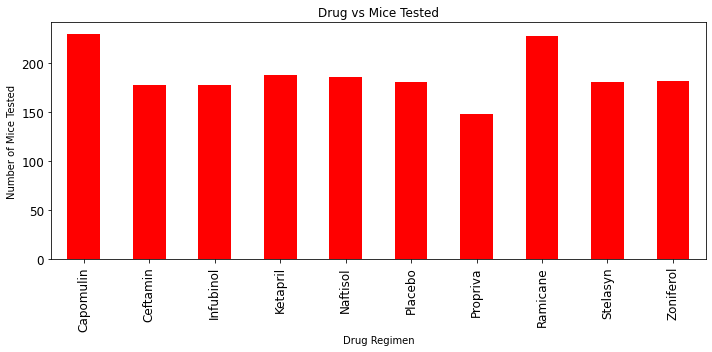

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [246]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#set x_axis and tick locations

mice = drop.groupby(["Drug Regimen"]).count()["Mouse ID"]
plot = mice.plot.bar(figsize = (10,5), color = "red", fontsize = 12)

# Create a list indicating where to write x labels and set figure size to adjust for space

plt.title("Drug vs Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.tight_layout()
plt.show()
mice

In [247]:
# Generate a bar plot showing the total number of timepoints 
#for all mice tested for each drug regimen using pyplot.

#Convert into a series
mice_py = (drop.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_py

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

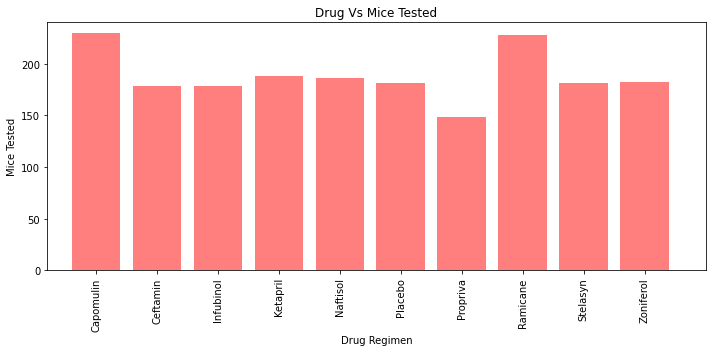

In [248]:
x_axis = np.arange(len(mice_py))
fig1, ax1 = plt.subplots(figsize = (10, 5))
plt.bar(x_axis, mice_py, color ="red", alpha =.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 
           'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.xlim(-0.80, len(x_axis))
plt.ylim(0, max(mice_py)+10)

plt.title("Drug Vs Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested")

plt.tight_layout()
plt.show()

In [249]:
#create a DF with gender group
gender_df = ["Female", "Male"] 
count = [(922/1880*100),(958/1880*100)]
gen_df = pd.DataFrame({"Gender": gender_df ,"Count": count})
gen_df

,Gender,Count
0,Female,49.042553
1,Male,50.957447


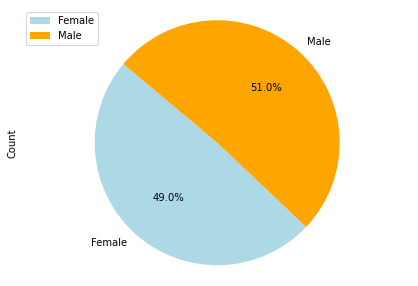

In [250]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

colors = ["lightblue","orange"]

plot = gen_df.plot.pie(y="Count", labels=("Female","Male"), figsize=(7,5), colors = colors, autopct="%1.1f%%",
                             startangle=140,)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.show()

In [251]:
mice_sex = (drop.groupby(["Sex"])["Mouse ID"].count())
mice_sex.head()

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

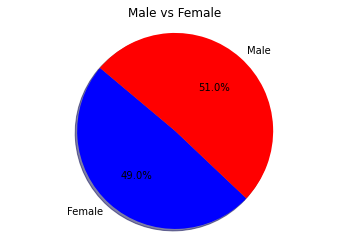

In [252]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Female","Male"]
size = [922,958]
colors = ['blue', 'red']

plt.title("Male vs Female")

plt.pie(mice_sex, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.show()


## Quartiles, Outliers and Boxplots

In [257]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Start by getting the last (greatest) timepoint for each mouse

FTV = drop[drop["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
FTV
sorting = FTV.sort_values(["Timepoint"], ascending=False)
sorting
FTV_df = sorting[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
FTV_df


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1872,Infubinol,z581,45,62.754451
800,Infubinol,e476,45,62.435404
154,Ramicane,c758,45,33.397653
440,Capomulin,i557,45,47.685963
144,Capomulin,m957,45,33.329098
...,...,...,...,...
75,Ramicane,z578,0,45.000000
1113,Ceftamin,l490,0,45.000000
1120,Ceftamin,l558,0,45.000000
1123,Ceftamin,l661,0,45.000000


In [258]:
# Put treatments into a list for for loop (and later for plot labels)

Capomulin_df = FTV_df.loc[drop["Drug Regimen"] == "Capomulin",:]
Ramicane_df = FTV_df.loc[drop["Drug Regimen"] == "Ramicane",:]
Infubinol_df = FTV_df.loc[drop["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = FTV_df.loc[drop["Drug Regimen"] == "Ceftamin",:]

Drugs = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]


In [259]:
# Solve for Capomulin
cap_time = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
cap_vol = pd.DataFrame(cap_time)
cap_merge = pd.merge(cap_vol, drop, on=("Mouse ID","Timepoint"),how="left")
cap_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [260]:
# Locate the rows which contain mice on each drug and get the tumor volumes (take cap merged df and create a new one with tum vol)   

cap_tumor = cap_merge["Tumor Volume (mm3)"]
# find # Calculate the IQR and quantitatively 
#determine if there are any potential outliers. 
# add subset 
    
cap_quartiles = cap_tumor.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]

cap_iqr = cap_upperq-cap_lowerq

# Determine outliers using upper and lower bounds 
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

# determine if there are any potential outliers.
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")


Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [261]:
# repeat process above to take the drug df and group by the mouse id and timepoint. create a merged dataset with drop
rad_time = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
rad_vol = pd.DataFrame(rad_time)
rad_merge = pd.merge(rad_vol, drop, on=("Mouse ID","Timepoint"),how="left")


# take rad merged df and create a new one with tum vol)   
rad_tumor = rad_merge["Tumor Volume (mm3)"]
rad_quartiles = rad_tumor.quantile([.25,.5,.75])
rad_lowerq = rad_quartiles[0.25]
rad_upperq = rad_quartiles[0.75]
rad_iqr = rad_upperq-rad_lowerq
rad_lower_bound = rad_lowerq - (1.5*rad_iqr)
rad_upper_bound = rad_upperq + (1.5*rad_iqr)

print(f"Values below {rad_lower_bound} could be outliers.")
print(f"Values above {rad_upper_bound} could be outliers.")

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [262]:
# repeat process above to take the drug df and group by the mouse id and timepoint. create a merged dataset with drop
in_time = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
in_vol = pd.DataFrame(in_time)
in_merge = pd.merge(in_vol, drop, on=("Mouse ID","Timepoint"),how="left")

# take rad merged df and create a new one with tum vol)   
in_tumor = in_merge["Tumor Volume (mm3)"]
in_quartiles = in_tumor.quantile([.25,.5,.75])
in_lowerq = in_quartiles[0.25]
in_upperq = in_quartiles[0.75]
in_iqr = in_upperq-in_lowerq
in_lower_bound = in_lowerq - (1.5*in_iqr)
in_upper_bound = in_upperq + (1.5*in_iqr)

print(f"Values below {in_lower_bound} could be outliers.")
print(f"Values above {in_upper_bound} could be outliers.")

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [263]:
# repeat process above to take the drug df and group by the mouse id and timepoint. create a merged dataset with drop
cef_time = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
cef_vol = pd.DataFrame(cef_time)
cef_merge = pd.merge(cef_vol, drop, on=("Mouse ID","Timepoint"),how="left")

# take rad merged df and create a new one with tum vol)   
cef_tumor = cef_merge["Tumor Volume (mm3)"]
cef_quartiles = cef_tumor.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


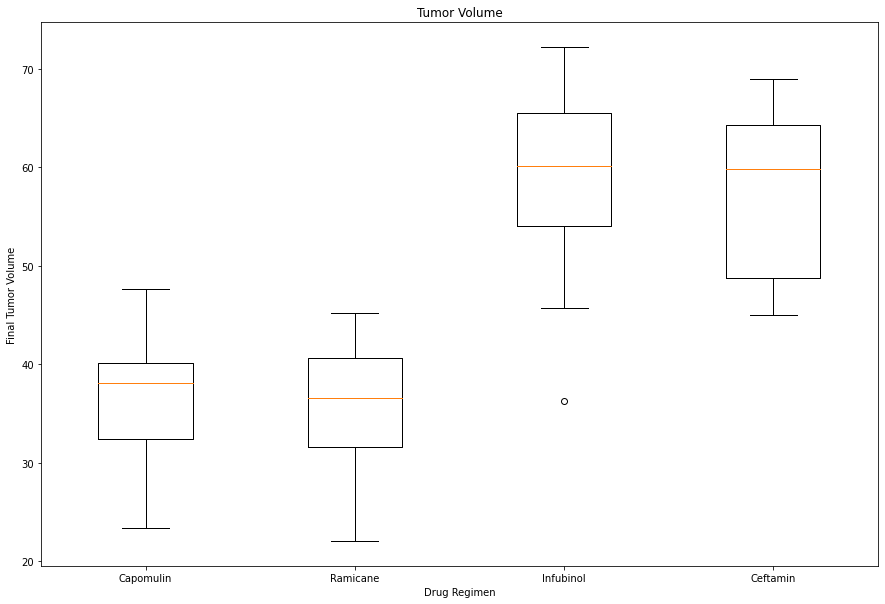

In [264]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#add in the dataframe that each is getting pulled from
box_df = [cap_tumor, rad_tumor, in_tumor, cef_tumor]
#add in labels
lables = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#create the box plot with fig,titles, labels and limits
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume')
ax1.set_ylabel('Final Tumor Volume')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(box_df, labels=lables)

plt.show()

## Line and Scatter Plots

In [265]:
#Find mouse ID (use a random one from the output DF above)
cap_mouse = drop[drop["Mouse ID"].isin(["v923"])]
cap_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
341,v923,Capomulin,Female,19,21,0,45.000000,0
342,v923,Capomulin,Female,19,21,5,45.704434,0
343,v923,Capomulin,Female,19,21,10,39.848223,0
344,v923,Capomulin,Female,19,21,15,40.457989,0
345,v923,Capomulin,Female,19,21,20,39.648296,0
346,v923,Capomulin,Female,19,21,25,40.156413,1
347,v923,Capomulin,Female,19,21,30,40.752216,2
348,v923,Capomulin,Female,19,21,35,41.439242,2
349,v923,Capomulin,Female,19,21,40,42.151015,2
350,v923,Capomulin,Female,19,21,45,40.658124,2


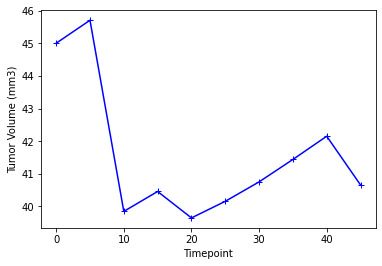

In [266]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_v = cap_mouse["Tumor Volume (mm3)"]
time_point = cap_mouse["Timepoint"]

#create a line plot and add in the chart elements (like the kind of marker, the color, the label)
line, = plt.plot(time_point, tumor_v, marker="+",color="blue")

#create the labels for the x and y
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

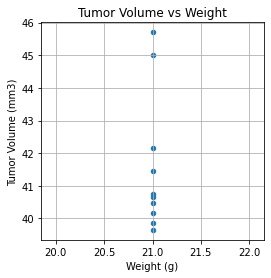

In [267]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_mouse.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(4,4),
              title="Tumor Volume vs Weight")
plt.show()

## Correlation and Regression

In [281]:
#Create the dataframe for the scatterplot for ONLY Capomulin regimen. You need to group by the Mouse ID for weight & tumor vol.
Capomulin_df2 = drop.loc[drop["Drug Regimen"] == "Capomulin",:]
weight_vol =Capomulin_df2.groupby(['Mouse ID']).mean()

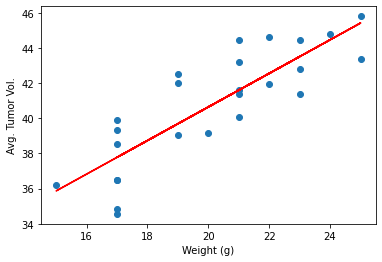

In [282]:
#create the x and create the y values using the above dataframe. weight and average tumor volume will be x and y values.
x_values = weight_vol["Weight (g)"]
y_values = weight_vol["Tumor Volume (mm3)"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Avg. Tumor Vol.")
plt.show()

In [283]:
#find the numbers each row is in for pearson
weight_vol

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


In [284]:
# use Pearson correlation coefficient between weight and vol to find the correlation
weight_data = weight_vol.iloc[:,1]
vol_data = weight_vol.iloc[:,3]
corr= st.pearsonr(weight_data,vol_data)
print(f'The correlation between mouse weight and the average tumor volume is {round(corr[0],2)}')

The correlation between mouse weight and the average tumor volume is 0.84
